# Creating plots of your dataframes

### The easiest way to create plots good plot is these 2 options:
#### - use the seaborn library for plots
#### - or if you want interactive plots use a library called plotly express

In [1]:
import pandas as pd
import seaborn as sns

import plotly.express as px

# some nicer plotly setting
import plotly.io as pio
pio.templates.default = 'plotly_white'

df = pd.read_csv('https://github.com/wortell-smart-learning/python-data-fundamentals/raw/main/data/most_voted_titles_enriched.csv')

df.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre1,...,country,primary_language,color,budget,opening_weekend_usa,gross_usa,cumulative_worldwide,tagline,summary,image_url
0,tt0010323,movie,The Cabinet of Dr. Caligari,Das Cabinet des Dr. Caligari,0,1920,NaN,76.000,"Fantasy,Horror,Mystery",Fantasy,...,Germany,None,Black and White,"$18,000",NaN,"$8,811","$8,811",You must become Caligari.,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",https://m.media-amazon.com/images/M/MV5BNWJiNG...
1,tt0012349,movie,The Kid,The Kid,0,1921,NaN,68.000,"Comedy,Drama,Family",Comedy,...,USA,None,Black and White,"$250,000",NaN,NaN,"$26,916",This is the great film he has been working on ...,"The Tramp cares for an abandoned child, but ev...",https://m.media-amazon.com/images/M/MV5BZjhhMT...
2,tt0013442,movie,Nosferatu,"Nosferatu, eine Symphonie des Grauens",0,1922,NaN,94.000,"Fantasy,Horror",Fantasy,...,Germany,None,Black and White,NaN,NaN,NaN,"$19,054",A thrilling mystery masterpiece - a chilling p...,Vampire Count Orlok expresses interest in a ne...,https://m.media-amazon.com/images/M/MV5BMTAxYj...


### Let's see how you make a scatter plot in seaborn and plot runtime vs the average rating.
### The syntax is usually like this:
#### - specify the dataframe you want to use
#### - specify your x-variable
#### - specify your y-variable
#### - and if you would like to color certain points, then specify the hue

### Here's the seaborn way of doing things:

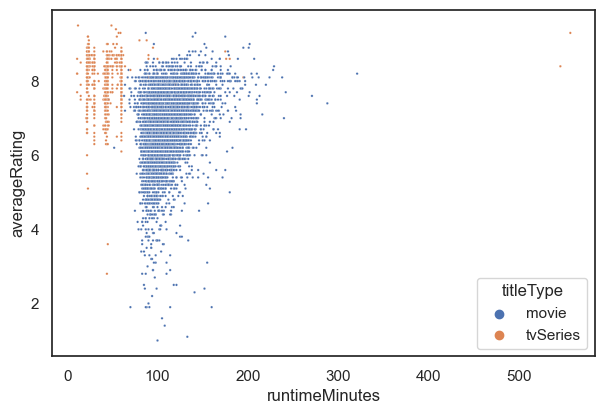

In [2]:
sns.scatterplot(
    data=df, 
    x='runtimeMinutes', 
    y='averageRating', 
    hue='titleType', 
    s=3.
);

### But plotting interactive plots is just as easy and makes it easier to check outliers. We are using plotly.express for this.

In [4]:
px.scatter(
    title='runtime vs average rating',
    data_frame=df.query('runtimeMinutes < 400'), 
    x='runtimeMinutes', 
    y='averageRating', 
    color='titleType',
    hover_data=['primaryTitle'],
    opacity=0.4,
    height=500,
    width=700,
)

### There all sorts of plots with plotly.express. Here's an example of a histogram

In [6]:
px.histogram(
    title='Histogram of average rating vs titletype',
    data_frame=df,
    x='averageRating',
    color='titleType',
    histnorm='probability density',
    width=700,
)

### Or a boxplot of rating by titletype

In [8]:
px.box(
    title='Comparing average rating by titleType',
    data_frame=df,
    x='titleType',
    y='averageRating',
    width=700,
)

### Sometimes you don't even need to specify the x and y value. This is the case when there's only an index and 1 column

In [10]:
px.bar(df['country'].value_counts().head(5), width=700)